# Make English Speech Dataset
- Combining 8 English Speech Dataset
- Dataset: CREMA-D, MELD, MLEND, RAVDESS, SAVEE, TESS, ESD, JL-Corpus

## 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import tqdm

In [2]:
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)

Numpy Version: 2.1.3
Pandas Version: 2.2.3


## 1. Load Dataset and Make Sub Dataframes
### 1) CREMA-D
> https://github.com/CheyneyComputerScience/CREMA-D

- `VideoDemographics.csv` - a mapping of ActorID (the first 4 digits of each video file) to Age, Sex, Race, and Ethicity.
```shell
"ActorID" - the first 4 digits of the video/audio file that identifies the actor in the video.
"Age" - the age in years of the actor at the time of the recording
"Sex" - the binary sex that the actor identified
"Race" - African American, Asian, Caucasian, or Unknown
"Ethnicity" - Hispanic or Not Hispanic
```
- Actors spoke from a selection of 12 sentences (in parentheses is the three letter acronym used in the second part of the filename):
```
It's eleven o'clock (IEO).
That is exactly what happened (TIE).
I'm on my way to the meeting (IOM).
I wonder what this is about (IWW).
The airplane is almost full (TAI).
Maybe tomorrow it will be cold (MTI).
I would like a new alarm clock (IWL)
I think I have a doctor's appointment (ITH).
Don't forget a jacket (DFA).
I think I've seen this before (ITS).
The surface is slick (TSI).
We'll stop in a couple of minutes (WSI).
```
- The sentences were presented using different emotion (in parentheses is the three letter code used in the third part of the filename):
```
Anger (ANG)
Disgust (DIS)
Fear (FEA)
Happy/Joy (HAP)
Neutral (NEU)
Sad (SAD)
```
- Emotion level (in parentheses is the two letter code used in the fourth part of the filename):
```
Low (LO)
Medium (MD)
High (HI)
Unspecified (XX)
```

In [3]:
crema_dir = './dataset/crema-d'
crema_filepath = glob.glob(os.path.join(crema_dir, "AudioWAV", "*.wav"))
crema_filename = os.listdir(os.path.join(crema_dir, "AudioWAV"))

print(crema_filename[:5])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav']


In [4]:
crema_count = len(crema_filename)
print("The Number of CREMA-D Dataset:", crema_count)

The Number of CREMA-D Dataset: 7442


In [5]:
feature_list = []
for fn in crema_filename:
    feature_list.append(fn.split(".wav")[0].split("_"))

In [6]:
print(np.shape(feature_list))
print(feature_list[:10])

(7442, 4)
[['1001', 'DFA', 'ANG', 'XX'], ['1001', 'DFA', 'DIS', 'XX'], ['1001', 'DFA', 'FEA', 'XX'], ['1001', 'DFA', 'HAP', 'XX'], ['1001', 'DFA', 'NEU', 'XX'], ['1001', 'DFA', 'SAD', 'XX'], ['1001', 'IEO', 'ANG', 'HI'], ['1001', 'IEO', 'ANG', 'LO'], ['1001', 'IEO', 'ANG', 'MD'], ['1001', 'IEO', 'DIS', 'HI']]


In [7]:
crema_ext = [os.path.splitext(fn)[-1] for fn in crema_filename]

In [8]:
crema_emotion_list = {"ANG":"Anger", "DIS":"Disgust", "FEA":"Fear", "HAP":"Happy", "NEU":"Neutral", "SAD":"Sad"}
crema_emotion = [crema_emotion_list[f[2]] for f in feature_list]

In [9]:
crema_df = pd.DataFrame(index = range(0, crema_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [10]:
crema_df['Dataset'] = ['CREMA-D'] * crema_count
crema_df['Filepath'] = crema_filepath
crema_df['Filename'] = crema_filename
crema_df['Ext'] = crema_ext
crema_df['Emotion'] = crema_emotion

In [11]:
crema_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Anger
1,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Disgust
2,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Fear
3,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Happy
4,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Neutral


### 2) MELD
> https://affective-meld.github.io/
- There are `train`, `test` and `dev` data in MELD dataset
- We only use `train`.

- `train_sent_emo.csv`, `test_sent_emo.csv`
```shell
"Sr No."	Serial numbers of the utterances mainly for referencing the utterances in case of different versions or multiple copies with different subsets
"Utterance"	Individual utterances from EmotionLines as a string.
"Speaker"	Name of the speaker associated with the utterance.
"Emotion"	The emotion (neutral, joy, sadness, anger, surprise, fear, disgust) expressed by the speaker in the utterance.
"Sentiment"	The sentiment (positive, neutral, negative) expressed by the speaker in the utterance.
"Dialogue_ID"	The index of the dialogue starting from 0.
"Utterance_ID"	The index of the particular utterance in the dialogue starting from 0.
"Season"	The season no. of Friends TV Show to which a particular utterance belongs.
"Episode"	The episode no. of Friends TV Show in a particular season to which the utterance belongs.
"StartTime"	The starting time of the utterance in the given episode in the format 'hh:mm:ss,ms'.
"EndTime"	The ending time of the utterance in the given episode in the format 'hh:mm:ss,ms'.
```

In [12]:
meld_dir = './dataset/meld'

meld_filepath = glob.glob(os.path.join(meld_dir, "train", "*.mp4"))
meld_filename = os.listdir(os.path.join(meld_dir, "train"))

print(meld_filename[:5])

['dia0_utt0.mp4', 'dia0_utt1.mp4', 'dia0_utt10.mp4', 'dia0_utt11.mp4', 'dia0_utt12.mp4']


In [13]:
meld_sub_df = pd.read_csv(os.path.join(meld_dir, 'train_sent_emo.csv'))

meld_sub_df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [14]:
meld_emotion = []
meld_ext = []
emotion_list = {"anger":"Anger", "disgust":"Disgust", "fear":"Fear", "joy":"Happy", 
                "neutral":"Neutral", "sadness":"Sad", "surprise":"Surprise"}
for fn in meld_filename:
    name, ext = os.path.splitext(fn)
    dia, utt = name.split("_")
    dia = int(dia.replace("dia", ""))
    utt = int(utt.replace("utt", ""))
    
    row = meld_sub_df[(meld_sub_df['Dialogue_ID']==dia) & (meld_sub_df['Utterance_ID']==utt)]
    
    emo = row['Emotion'].values[0]
    meld_emotion.append(emotion_list[emo])
    
    meld_ext.append(ext)

In [15]:
meld_count = len(meld_ext)
print("The Number of MELD Dataset:", meld_count)

The Number of MELD Dataset: 9988


In [16]:
meld_df = pd.DataFrame(index = range(0, meld_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [17]:
meld_df['Dataset'] = ["MELD"] * meld_count
meld_df['Filepath'] = meld_filepath
meld_df['Filename'] = meld_filename
meld_df['Ext'] = meld_ext
meld_df['Emotion'] = meld_emotion

In [18]:
meld_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,MELD,./dataset/meld\train\dia0_utt0.mp4,dia0_utt0.mp4,.mp4,Neutral
1,NaN,MELD,./dataset/meld\train\dia0_utt1.mp4,dia0_utt1.mp4,.mp4,Neutral
2,NaN,MELD,./dataset/meld\train\dia0_utt10.mp4,dia0_utt10.mp4,.mp4,Fear
3,NaN,MELD,./dataset/meld\train\dia0_utt11.mp4,dia0_utt11.mp4,.mp4,Neutral
4,NaN,MELD,./dataset/meld\train\dia0_utt12.mp4,dia0_utt12.mp4,.mp4,Surprise


### 3) MLEnd
> https://www.kaggle.com/datasets/jesusrequena/mlend-spoken-numerals
- Speakers read one english word (zero to billion).

In [19]:
mlend_dir = './dataset/mlend'

mlend_filepath = glob.glob(os.path.join(mlend_dir, 'MLEndSND_Public', "*.wav"))
mlend_filename = os.listdir(os.path.join(mlend_dir, 'MLEndSND_Public'))

print(mlend_filename[:5])

['00000.wav', '00001.wav', '00003.wav', '00004.wav', '00005.wav']


In [20]:
for path in glob.glob(os.path.join(mlend_dir, "*.csv")):
    print(path)
    csv = pd.read_csv(path)
    print(csv.tail(), "\n")

./dataset/mlend\MLEndSND_Audio_Attributes.csv
       Public filename     Numeral Intonation  Speaker
32649            47063          11    neutral       33
32650            47064           9    excited       91
32651            47065  1000000000    neutral      111
32652            47066        1000    neutral       15
32653            47067           0    neutral       82 



In [21]:
mlend_sub_df1 = pd.read_csv("./dataset/mlend\MLEndSND_Audio_Attributes.csv")
mlend_sub_df1.head()

,Public filename,Numeral,Intonation,Speaker
0,0,3,excited,59
1,1,1000000,question,31
2,3,15,excited,107
3,4,13,excited,114
4,5,19,neutral,132


In [22]:
mlend_count = len(mlend_filename)
print("The Number of MLEND Dataset:", mlend_count)

The Number of MLEND Dataset: 32654


In [23]:
mlend_emotion = []
mlend_ext = []
emotion_list = {"excited":"Happy", "neutral":"Neutral", "bored":"Bored", "question":"Question"}
for i in range(mlend_count):
    _, ext = os.path.splitext(mlend_filename[i])
    speaker_num = mlend_sub_df1.iloc[i]["Speaker"]
    speaker = "Mlend_" + str(speaker_num)
        
    emotion = mlend_sub_df1.iloc[i]["Intonation"]
    emotion = emotion_list[emotion]
    
    mlend_emotion.append(emotion)
    mlend_ext.append(ext)

In [24]:
mlend_df = pd.DataFrame(index = range(0, mlend_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [25]:
mlend_df['Dataset'] = ["MLEND"] * mlend_count
mlend_df['Filepath'] = mlend_filepath
mlend_df['Filename'] = mlend_filename
mlend_df['Ext'] = mlend_ext
mlend_df['Emotion'] = mlend_emotion

In [26]:
mlend_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,MLEND,./dataset/mlend\MLEndSND_Public\00000.wav,00000.wav,.wav,Happy
1,NaN,MLEND,./dataset/mlend\MLEndSND_Public\00001.wav,00001.wav,.wav,Question
2,NaN,MLEND,./dataset/mlend\MLEndSND_Public\00003.wav,00003.wav,.wav,Happy
3,NaN,MLEND,./dataset/mlend\MLEndSND_Public\00004.wav,00004.wav,.wav,Happy
4,NaN,MLEND,./dataset/mlend\MLEndSND_Public\00005.wav,00005.wav,.wav,Neutral


### 4) RAVDESS
> https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
- Only two kinds of statement.

- Labels in Filename.
```shell
Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
```
```shell
Filename example: 03-01-06-01-02-01-12.wav

Audio-only (03)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.
```

In [27]:
rav_dir = './dataset/ravdess'
actor_list = os.listdir(rav_dir)
actor_list[:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [28]:
rav_filepath = []
rav_filename = []
rav_ext = []
rav_emotion = []

emotion_list = {'01':'Neutral', '02':'Calm', '03':'Happy', '04':'Sad', '05':'Anger', '06':'Fear', '07':'Disgust', '08':'Surprise'}

for act in actor_list:
    paths = glob.glob(os.path.join(rav_dir, act, "*.wav")) 
    names = os.listdir(os.path.join(rav_dir, act))
    
    for i in range(len(names)):
        name, ext = os.path.splitext(names[i])
        num_list = name.split("-")
        
        emotion = emotion_list[num_list[2]]
        speaker = "Ravdess_" + num_list[6]
        
        if int(num_list[6])%2 == 0:
            gender = 'Female'
        else:
            gender = "Male"
        
        rav_filepath.append(paths[i])
        rav_filename.append(names[i])
        rav_ext.append(ext)
        
        rav_emotion.append(emotion)

In [29]:
rav_count = len(rav_filepath)
print("The Number of RAVDESS Dataset:", rav_count)

The Number of RAVDESS Dataset: 1440


In [30]:
rav_df = pd.DataFrame(index = range(0, rav_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [31]:
rav_df["Dataset"] = ["RAVDESS"] * rav_count
rav_df['Filepath'] = rav_filepath
rav_df['Filename'] = rav_filename
rav_df['Ext'] = rav_ext
rav_df['Emotion'] = rav_emotion

In [32]:
rav_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,RAVDESS,./dataset/ravdess\Actor_01\03-01-01-01-01-01-0...,03-01-01-01-01-01-01.wav,.wav,Neutral
1,NaN,RAVDESS,./dataset/ravdess\Actor_01\03-01-01-01-01-02-0...,03-01-01-01-01-02-01.wav,.wav,Neutral
2,NaN,RAVDESS,./dataset/ravdess\Actor_01\03-01-01-01-02-01-0...,03-01-01-01-02-01-01.wav,.wav,Neutral
3,NaN,RAVDESS,./dataset/ravdess\Actor_01\03-01-01-01-02-02-0...,03-01-01-01-02-02-01.wav,.wav,Neutral
4,NaN,RAVDESS,./dataset/ravdess\Actor_01\03-01-02-01-01-01-0...,03-01-02-01-01-01-01.wav,.wav,Calm


### 5) SAVEE
> https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee

- Labels in Filename
```shell
"a":"Anger"
"d":"Disgust"
"f":"Fear"
"h":"Happy"
"n":"Neutral"
"sa":"Sad"
"su":"Surprise"
```

In [33]:
savee_dir = './dataset/savee'
savee_filename = os.listdir(savee_dir)
savee_filepath = glob.glob(os.path.join(savee_dir, "*.wav"))
print(savee_filename[:5])

savee_count = len(savee_filepath)
print("The Number of SAVEE Dataset:", savee_count)

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']
The Number of SAVEE Dataset: 480


In [34]:
savee_ext = []
savee_emotion = []
emotion_list = {"a":"Anger", "d":"Disgust", "f":"Fear", "h":"Happy", "n":"Neutral", "sa":"Sad", "su":"Surprise"}
for fn in savee_filename:
    name, ext = os.path.splitext(fn)
    
    speaker, emo = name.split("_")
    emo = emo[:-2]
    emotion = emotion_list[emo]
    speaker = "Savee_" + speaker

    savee_ext.append(ext)
    savee_emotion.append(emotion)

In [35]:
savee_df = pd.DataFrame(index = range(0, savee_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [36]:
savee_df['Dataset'] = ["SAVEE"] * savee_count
savee_df['Filepath'] = savee_filepath
savee_df['Filename'] = savee_filename
savee_df['Ext'] = savee_ext
savee_df['Emotion'] = savee_emotion

In [37]:
savee_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,SAVEE,./dataset/savee\DC_a01.wav,DC_a01.wav,.wav,Anger
1,NaN,SAVEE,./dataset/savee\DC_a02.wav,DC_a02.wav,.wav,Anger
2,NaN,SAVEE,./dataset/savee\DC_a03.wav,DC_a03.wav,.wav,Anger
3,NaN,SAVEE,./dataset/savee\DC_a04.wav,DC_a04.wav,.wav,Anger
4,NaN,SAVEE,./dataset/savee\DC_a05.wav,DC_a05.wav,.wav,Anger


### 6) TESS
> https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess

- Labels in Folder name

```shell
OAF: 64, Female
YAF: 26, Female
```

In [38]:
tess_dir = './dataset/tess'
tess_folders = os.listdir(tess_dir)
print(tess_folders)

['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [39]:
tess_filepath = []
tess_filename = []
tess_ext = []
tess_emotion = []
emotion_list = {"angry":"Anger", "disgust":"Disgust", "happy": "Happy", "neutral":"Neutral", "Sad":"Sad", "sad":"Sad", 
                "Fear":"Fear", "fear":"Fear", "Pleasant_surprise":"Surprise", "pleasant_surprised":"Surprise"}
for f in tess_folders:
    speaker = f[:3]
    emotion = emotion_list[f[4:]]
        
    speaker = "Tess_" + speaker    
    filenames = os.listdir(os.path.join(tess_dir, f))
    filepaths = glob.glob(os.path.join(tess_dir, f, "*.wav"))
    
    for i in range(len(filenames)):
        _, ext = os.path.splitext(filenames[i])
        
    
        tess_filepath.append(filepaths[i])
        tess_filename.append(filenames[i])
        tess_ext.append(ext)
        tess_emotion.append(emotion)
    

In [40]:
tess_count = len(tess_filepath)
print("The Number of TESS Dataset:", tess_count)

The Number of TESS Dataset: 2799


In [41]:
tess_df = pd.DataFrame(index = range(0, tess_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [42]:
tess_df["Dataset"] = ["TESS"] * tess_count
tess_df["Filepath"] = tess_filepath
tess_df["Filename"] = tess_filename
tess_df["Ext"] = tess_ext
tess_df["Emotion"] = tess_emotion

In [43]:
tess_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,TESS,./dataset/tess\OAF_angry\OAF_back_angry.wav,OAF_back_angry.wav,.wav,Anger
1,NaN,TESS,./dataset/tess\OAF_angry\OAF_bar_angry.wav,OAF_bar_angry.wav,.wav,Anger
2,NaN,TESS,./dataset/tess\OAF_angry\OAF_base_angry.wav,OAF_base_angry.wav,.wav,Anger
3,NaN,TESS,./dataset/tess\OAF_angry\OAF_bath_angry.wav,OAF_bath_angry.wav,.wav,Anger
4,NaN,TESS,./dataset/tess\OAF_angry\OAF_bean_angry.wav,OAF_bean_angry.wav,.wav,Anger


## 7) ESD
> https://hltsingapore.github.io/ESD/download.html
- There is only English data in folder `0011` to `0020`.

In [44]:
esd_dir = './dataset/esd'
esd_folders = os.listdir(esd_dir)

In [45]:
esd_sub_df = []
for f in esd_folders:
    path = os.path.join(esd_dir, f, f+".txt")
    with open(path, "r") as f:
        for line in f:
            esd_sub_df.append(line.strip().split("\t"))

In [46]:
print(np.shape(esd_sub_df))
print(esd_sub_df[0])

esd_count = len(esd_sub_df)
print("The Number of ESD Dataset:", esd_count)

(17500, 3)
['0011_000001', 'The nine the eggs, I keep.', 'Neutral']
The Number of ESD Dataset: 17500


In [47]:
esd_ext = []
esd_filename = []
esd_filepath = []
esd_emotion = []
emotion_list = {"Angry":"Anger", "Happy":"Happy", "Neutral":"Neutral", "Sad":"Sad", "Surprise":"Surprise"}
for sub in esd_sub_df:
    ext = ".wav"
    filename = sub[0] + ext
    speaker = sub[0][:4]
    filepath = os.path.join(esd_dir, speaker, sub[2], filename)
    
    emotion = emotion_list[sub[2]]
    
    esd_ext.append(ext)
    esd_filename.append(filename)
    esd_filepath.append(filepath)
    esd_emotion.append(emotion)

In [48]:
esd_df = pd.DataFrame(index = range(0, esd_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [49]:
esd_df['Dataset'] = ["ESD"] * esd_count
esd_df['Filepath'] = esd_filepath
esd_df['Filename'] = esd_filename
esd_df['Ext'] = esd_ext
esd_df['Emotion'] = esd_emotion

In [50]:
esd_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,ESD,./dataset/esd\0011\Neutral\0011_000001.wav,0011_000001.wav,.wav,Neutral
1,NaN,ESD,./dataset/esd\0011\Neutral\0011_000002.wav,0011_000002.wav,.wav,Neutral
2,NaN,ESD,./dataset/esd\0011\Neutral\0011_000003.wav,0011_000003.wav,.wav,Neutral
3,NaN,ESD,./dataset/esd\0011\Neutral\0011_000004.wav,0011_000004.wav,.wav,Neutral
4,NaN,ESD,./dataset/esd\0011\Neutral\0011_000005.wav,0011_000005.wav,.wav,Neutral


## 8) JL Corpus
> https://www.kaggle.com/datasets/tli725/jl-corpus

- Labels in Filename
```
File naming rule: (Gender)(speaker.ID)_(Emotion)_(Sentence.ID)(session.ID)
```

In [51]:
jl_dir = './dataset/jl-corpus/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)'
print(os.listdir(jl_dir)[:5])

['female1_angry_10a_1.txt', 'female1_angry_10a_1.wav', 'female1_angry_10a_2.txt', 'female1_angry_10a_2.wav', 'female1_angry_10b_1.txt']


In [52]:
jl_filename = os.listdir(jl_dir)
jl_filename = [fn for fn in jl_filename if os.path.splitext(fn)[1] == '.wav']
jl_filepath = glob.glob(os.path.join(jl_dir, "*.wav"))

In [53]:
jl_count = len(jl_filename)
print("The Number of JL-Corpus Dataset:", jl_count)

The Number of JL-Corpus Dataset: 2400


In [54]:
jl_ext = []
jl_emotion = []
emotion_list = {"angry":"Anger", "anxious":"Anxious", "apologetic":"Apologetic", "assertive":"Assertive", "concerned":"Concerned", 
                "encouraging":"Encouraging", "excited":"Excited", "happy":"Happy", "neutral":"Neutral", "sad":"Sad"}
gender_list = {"female1":"Female", "female2":"Female", "male1":"Male", "male2":"Male"}
for i in range(jl_count):
    name, ext = os.path.splitext(jl_filename[i])
    fn_list = jl_filename[i].split("_")
    
    emotion = emotion_list[fn_list[1]]
    
    text = ''
    with open(os.path.join(jl_dir, name + ".txt"), "r") as f:
        for line in f:
            text += line

    jl_ext.append(ext)
    jl_emotion.append(emotion)

In [55]:
print(np.unique(jl_emotion))

['Anger' 'Anxious' 'Apologetic' 'Assertive' 'Concerned' 'Encouraging'
 'Excited' 'Happy' 'Neutral' 'Sad']


In [56]:
jl_df = pd.DataFrame(index = range(0, jl_count), 
                  columns = ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion'])

In [57]:
jl_df['Dataset'] = ['JL-CORPUS'] * jl_count
jl_df['Filepath'] = jl_filepath
jl_df['Filename'] = jl_filename
jl_df['Ext'] = jl_ext
jl_df['Emotion'] = jl_emotion

In [58]:
jl_df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_angry_10a_1.wav,.wav,Anger
1,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_angry_10a_2.wav,.wav,Anger
2,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_angry_10b_1.wav,.wav,Anger
3,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_angry_10b_2.wav,.wav,Anger
4,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_angry_11a_1.wav,.wav,Anger


## 2. Make Dataframe

In [59]:
df = pd.concat([crema_df, meld_df, mlend_df, rav_df, savee_df, tess_df, esd_df, jl_df], ignore_index = True)
df

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Anger
1,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Disgust
2,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Fear
3,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Happy
4,NaN,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Neutral
...,...,...,...,...,...,...
74698,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_8b_2.wav,.wav,Sad
74699,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_1.wav,.wav,Sad
74700,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_2.wav,.wav,Sad
74701,NaN,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_1.wav,.wav,Sad


In [60]:
df['Id'] = np.arange(len(df))
df.tail()

,Id,Dataset,Filepath,Filename,Ext,Emotion
74698,74698,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_8b_2.wav,.wav,Sad
74699,74699,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_1.wav,.wav,Sad
74700,74700,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_2.wav,.wav,Sad
74701,74701,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_1.wav,.wav,Sad
74702,74702,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_2.wav,.wav,Sad


## 3. EDA Analysis of raw audio

### Audio duration analysis

In [61]:
import subprocess
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

In [62]:
df.head()

,Id,Dataset,Filepath,Filename,Ext,Emotion
0,0,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Anger
1,1,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Disgust
2,2,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Fear
3,3,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Happy
4,4,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Neutral


In [63]:
print("Columns:", list(df.columns))
print("The number of dataset:", len(df))

Columns: ['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'Emotion']
The number of dataset: 74703


In [64]:
def get_duration(filepath):
    """
    Uses ffprobe to extract the duration (in seconds) of an audio/video file.
    """
    command = [
        'ffprobe',
        '-v', 'error',
        '-show_entries', 'format=duration',
        '-of', 'default=noprint_wrappers=1:nokey=1',
        filepath
    ]
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
    try:
        duration = float(result.stdout.strip())
    except ValueError:
        duration = None
    return duration

# Read your CSV file
filepaths = df['Filepath'].tolist()

# Use parallel processing to get durations
with ThreadPoolExecutor() as executor:
    durations = list(executor.map(get_duration, filepaths))

df['duration'] = durations

In [65]:
df

,Id,Dataset,Filepath,Filename,Ext,Emotion,duration
0,0,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Anger,2.275563
1,1,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Disgust,2.335688
2,2,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Fear,2.168813
3,3,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Happy,1.868500
4,4,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Neutral,2.035375
...,...,...,...,...,...,...,...
74698,74698,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_8b_2.wav,.wav,Sad,2.350000
74699,74699,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_1.wav,.wav,Sad,2.250000
74700,74700,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_2.wav,.wav,Sad,2.350000
74701,74701,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_1.wav,.wav,Sad,2.150000


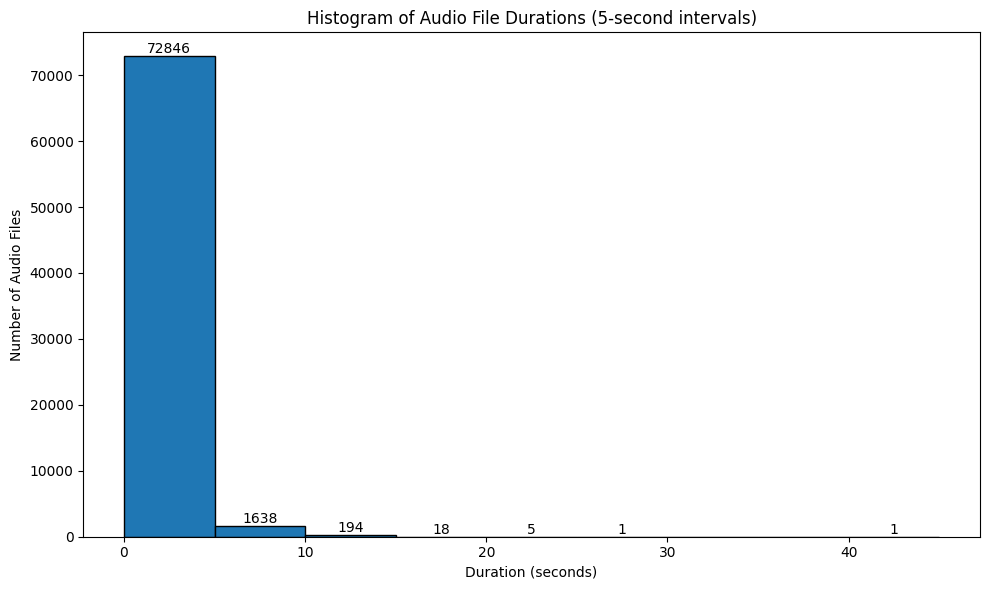

In [66]:
# Create bins for the histogram in intervals of 5 seconds
max_duration = df['duration'].max()
bins = np.arange(0, max_duration + 5, 5)

# Plot the histogram of audio durations
plt.figure(figsize=(10, 6))

# Plot the histogram and capture the returned values (counts, bin_edges, patches)
counts, bin_edges, patches = plt.hist(df['duration'], bins=bins, edgecolor='black')

plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Audio Files")
plt.title("Histogram of Audio File Durations (5-second intervals)")
plt.tight_layout()

# Annotate each bar with its count value
for patch in patches:
    height = patch.get_height()
    # Only annotate bars that have a non-zero count
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        plt.annotate(f'{int(height)}',
                     (x, height),
                     ha='center',
                     va='bottom')

plt.savefig("./plots/audio_duration_histogram_5seconds.png")
plt.show()

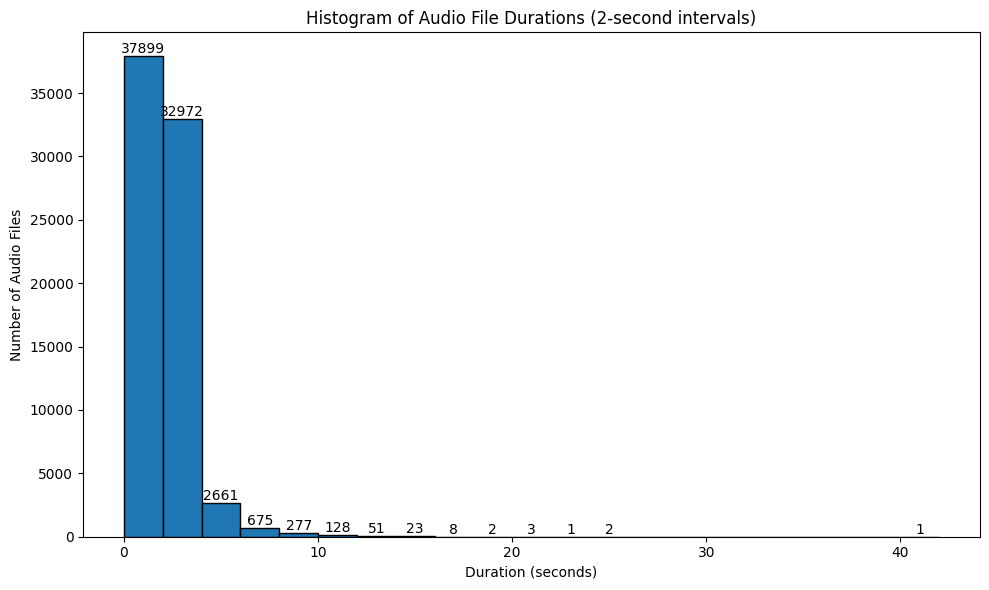

In [67]:
# Create bins for the histogram in intervals of 2 seconds
max_duration = df['duration'].max()
bins = np.arange(0, max_duration + 2, 2)

# Plot the histogram of audio durations
plt.figure(figsize=(10, 6))

# Plot the histogram and capture the returned values (counts, bin_edges, patches)
counts, bin_edges, patches = plt.hist(df['duration'], bins=bins, edgecolor='black')

plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Audio Files")
plt.title("Histogram of Audio File Durations (2-second intervals)")
plt.tight_layout()

# Annotate each bar with its count value
for patch in patches:
    height = patch.get_height()
    # Only annotate bars that have a non-zero count
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        plt.annotate(f'{int(height)}',
                     (x, height),
                     ha='center',
                     va='bottom')

plt.savefig("./plots/audio_duration_histogram_2seconds.png")
plt.show()

The distribution shows a few outliers (some are very long), we filter those out

In [68]:
threshold = df['duration'].quantile(0.99)
df = df[df['duration'] <= threshold].reset_index(drop=True)
df

,Id,Dataset,Filepath,Filename,Ext,Emotion,duration
0,0,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_ANG_XX.wav,1001_DFA_ANG_XX.wav,.wav,Anger,2.275563
1,1,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_DIS_XX.wav,1001_DFA_DIS_XX.wav,.wav,Disgust,2.335688
2,2,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_FEA_XX.wav,1001_DFA_FEA_XX.wav,.wav,Fear,2.168813
3,3,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_HAP_XX.wav,1001_DFA_HAP_XX.wav,.wav,Happy,1.868500
4,4,CREMA-D,./dataset/crema-d\AudioWAV\1001_DFA_NEU_XX.wav,1001_DFA_NEU_XX.wav,.wav,Neutral,2.035375
...,...,...,...,...,...,...,...
73954,74698,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_8b_2.wav,.wav,Sad,2.350000
73955,74699,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_1.wav,.wav,Sad,2.250000
73956,74700,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_2.wav,.wav,Sad,2.350000
73957,74701,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_1.wav,.wav,Sad,2.150000


In [69]:
df['Id'] = np.arange(len(df))
df = df[['Id', 'Dataset', 'Filepath', 'Filename', 'Ext', 'duration', 'Emotion']]
df.tail()

,Id,Dataset,Filepath,Filename,Ext,duration,Emotion
73954,73954,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_8b_2.wav,.wav,2.35,Sad
73955,73955,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_1.wav,.wav,2.25,Sad
73956,73956,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9a_2.wav,.wav,2.35,Sad
73957,73957,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_1.wav,.wav,2.15,Sad
73958,73958,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,male2_sad_9b_2.wav,.wav,2.15,Sad


In [70]:
df.to_csv("./speech_dataset.csv", index=False)

### Emotion distribution

In [71]:
emotion_counts = df['Emotion'].value_counts()
emotion_counts

Emotion
Neutral        18043
Happy          15467
Question        8201
Bored           8042
Anger           6693
Sad             6260
Surprise        5285
Fear            2168
Disgust         2168
Anxious          240
Apologetic       240
Assertive        240
Encouraging      240
Concerned        240
Excited          240
Calm             192
Name: count, dtype: int64

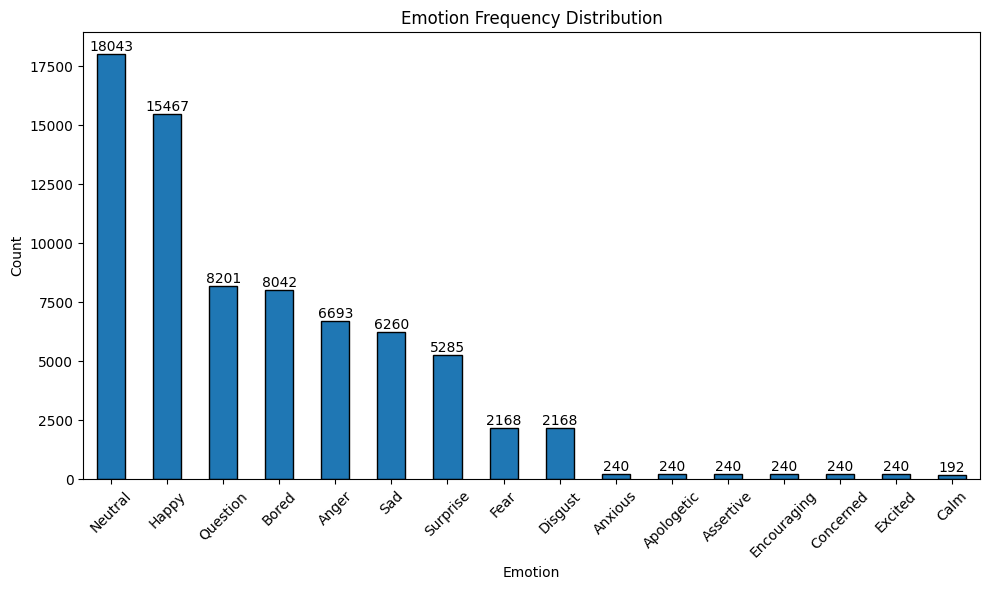

In [72]:
# Plot the emotion counts as a bar chart
plt.figure(figsize=(10, 6))
ax = emotion_counts.plot(kind="bar", edgecolor='black')
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Frequency Distribution")
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with its count value
for p in ax.patches:
    # Get the height of each bar (i.e., the count)
    height = p.get_height()
    # Place the annotation above the bar
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Save the plot as an image file
plt.savefig("./plots/emotion_counts_bar_chart.png")
plt.show()

## 3. Splitting into train and test

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop('Emotion', axis=1)
y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
# Check the shape of the dataframes:
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (59167, 6) (59167,)
Test set shapes: (14792, 6) (14792,)


In [76]:
X_train

,Id,Dataset,Filepath,Filename,Ext,duration
36470,36470,MLEND,./dataset/mlend\MLEndSND_Public\28504.wav,28504.wav,.wav,1.935556
6041,6041,CREMA-D,./dataset/crema-d\AudioWAV\1074_TSI_NEU_XX.wav,1074_TSI_NEU_XX.wav,.wav,2.769438
20617,20617,MLEND,./dataset/mlend\MLEndSND_Public\05698.wav,05698.wav,.wav,1.532517
1435,1435,CREMA-D,./dataset/crema-d\AudioWAV\1018_MTI_FEA_XX.wav,1018_MTI_FEA_XX.wav,.wav,1.835188
19086,19086,MLEND,./dataset/mlend\MLEndSND_Public\03450.wav,03450.wav,.wav,1.172608
...,...,...,...,...,...,...
13971,13971,MELD,./dataset/meld\train\dia723_utt3.mp4,dia723_utt3.mp4,.mp4,0.458791
50667,50667,RAVDESS,./dataset/ravdess\Actor_23\03-01-02-01-02-01-2...,03-01-02-01-02-01-23.wav,.wav,4.170833
44701,44701,MLEND,./dataset/mlend\MLEndSND_Public\40378.wav,40378.wav,.wav,1.219048
26090,26090,MLEND,./dataset/mlend\MLEndSND_Public\13569.wav,13569.wav,.wav,1.168277


In [77]:
X_test

,Id,Dataset,Filepath,Filename,Ext,duration
2962,2962,CREMA-D,./dataset/crema-d\AudioWAV\1037_ITH_DIS_XX.wav,1037_ITH_DIS_XX.wav,.wav,2.902875
2577,2577,CREMA-D,./dataset/crema-d\AudioWAV\1032_MTI_FEA_XX.wav,1032_MTI_FEA_XX.wav,.wav,3.103125
63650,63650,ESD,./dataset/esd\0016\Happy\0016_000842.wav,0016_000842.wav,.wav,1.940000
17651,17651,MLEND,./dataset/mlend\MLEndSND_Public\01389.wav,01389.wav,.wav,0.835918
62223,62223,ESD,./dataset/esd\0015\Sad\0015_001165.wav,0015_001165.wav,.wav,2.980000
...,...,...,...,...,...,...
65765,65765,ESD,./dataset/esd\0017\Sad\0017_001207.wav,0017_001207.wav,.wav,2.598000
71731,71731,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_apologetic_8a_1.wav,.wav,2.400000
64998,64998,ESD,./dataset/esd\0017\Angry\0017_000440.wav,0017_000440.wav,.wav,2.950000
52988,52988,TESS,./dataset/tess\YAF_disgust\YAF_raid_disgust.wav,YAF_raid_disgust.wav,.wav,2.566192


In [78]:
y_train

36470    Question
6041      Neutral
20617       Happy
1435         Fear
19086    Question
           ...   
13971       Happy
50667        Calm
44701       Happy
26090       Happy
8530      Neutral
Name: Emotion, Length: 59167, dtype: object

In [79]:
y_train.value_counts()

Emotion
Neutral        14434
Happy          12374
Question        6561
Bored           6434
Anger           5354
Sad             5008
Surprise        4228
Fear            1734
Disgust         1734
Apologetic       192
Excited          192
Concerned        192
Assertive        192
Encouraging      192
Anxious          192
Calm             154
Name: count, dtype: int64

In [80]:
y_test

2962        Disgust
2577           Fear
63650         Happy
17651         Happy
62223           Sad
            ...    
65765           Sad
71731    Apologetic
64998         Anger
52988       Disgust
19182      Question
Name: Emotion, Length: 14792, dtype: object

In [81]:
y_test.value_counts()

Emotion
Neutral        3609
Happy          3093
Question       1640
Bored          1608
Anger          1339
Sad            1252
Surprise       1057
Disgust         434
Fear            434
Encouraging      48
Concerned        48
Assertive        48
Excited          48
Anxious          48
Apologetic       48
Calm             38
Name: count, dtype: int64

In [82]:
# Recombine the train dataset
train_df = pd.concat([X_train, y_train], axis=1)

# Recombine the test dataset
test_df = pd.concat([X_test, y_test], axis=1)

In [83]:
train_df

,Id,Dataset,Filepath,Filename,Ext,duration,Emotion
36470,36470,MLEND,./dataset/mlend\MLEndSND_Public\28504.wav,28504.wav,.wav,1.935556,Question
6041,6041,CREMA-D,./dataset/crema-d\AudioWAV\1074_TSI_NEU_XX.wav,1074_TSI_NEU_XX.wav,.wav,2.769438,Neutral
20617,20617,MLEND,./dataset/mlend\MLEndSND_Public\05698.wav,05698.wav,.wav,1.532517,Happy
1435,1435,CREMA-D,./dataset/crema-d\AudioWAV\1018_MTI_FEA_XX.wav,1018_MTI_FEA_XX.wav,.wav,1.835188,Fear
19086,19086,MLEND,./dataset/mlend\MLEndSND_Public\03450.wav,03450.wav,.wav,1.172608,Question
...,...,...,...,...,...,...,...
13971,13971,MELD,./dataset/meld\train\dia723_utt3.mp4,dia723_utt3.mp4,.mp4,0.458791,Happy
50667,50667,RAVDESS,./dataset/ravdess\Actor_23\03-01-02-01-02-01-2...,03-01-02-01-02-01-23.wav,.wav,4.170833,Calm
44701,44701,MLEND,./dataset/mlend\MLEndSND_Public\40378.wav,40378.wav,.wav,1.219048,Happy
26090,26090,MLEND,./dataset/mlend\MLEndSND_Public\13569.wav,13569.wav,.wav,1.168277,Happy


In [84]:
train_df.to_csv("./train_dataset.csv", index=False)

In [85]:
test_df

,Id,Dataset,Filepath,Filename,Ext,duration,Emotion
2962,2962,CREMA-D,./dataset/crema-d\AudioWAV\1037_ITH_DIS_XX.wav,1037_ITH_DIS_XX.wav,.wav,2.902875,Disgust
2577,2577,CREMA-D,./dataset/crema-d\AudioWAV\1032_MTI_FEA_XX.wav,1032_MTI_FEA_XX.wav,.wav,3.103125,Fear
63650,63650,ESD,./dataset/esd\0016\Happy\0016_000842.wav,0016_000842.wav,.wav,1.940000,Happy
17651,17651,MLEND,./dataset/mlend\MLEndSND_Public\01389.wav,01389.wav,.wav,0.835918,Happy
62223,62223,ESD,./dataset/esd\0015\Sad\0015_001165.wav,0015_001165.wav,.wav,2.980000,Sad
...,...,...,...,...,...,...,...
65765,65765,ESD,./dataset/esd\0017\Sad\0017_001207.wav,0017_001207.wav,.wav,2.598000,Sad
71731,71731,JL-CORPUS,./dataset/jl-corpus/Raw JL corpus (unchecked a...,female1_apologetic_8a_1.wav,.wav,2.400000,Apologetic
64998,64998,ESD,./dataset/esd\0017\Angry\0017_000440.wav,0017_000440.wav,.wav,2.950000,Anger
52988,52988,TESS,./dataset/tess\YAF_disgust\YAF_raid_disgust.wav,YAF_raid_disgust.wav,.wav,2.566192,Disgust


In [86]:
test_df.to_csv("./test_dataset.csv", index=False)